# Social Media Prediction - 30 seconds

- team name: aaaaaaaaaaa
- team members
    - Marc-Antoine Bélanger
    - Eric Brunet
    - Jean-Philippe Gagnon-Fleury
- current submission
    - score: 1.69961
    - model: voting regressor
        - random forest regressor
        - gradient boosting regressor
        - custom regressor


# Project - 30 seconds

https://github.com/ebrunet28/smp

- 3 collaborators
- 21 branches
- 124 commits
- 30 pull requests
- 82 builds
- based on [whisk](https://github.com/whisk-ml/whisk) framework


# Data Cleaning - 30 seconds

In [1]:
from smp.features.features import Loader

loader = Loader()

print(loader.train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7500 entries, AL85S14OMDPF01I9 to LLKNQ56IFCSSCOT6
Data columns (total 23 columns):
User Name                                      7500 non-null object
Personal URL                                   3256 non-null object
Profile Cover Image Status                     7410 non-null object
Profile Verification Status                    7500 non-null object
Profile Text Color                             7434 non-null object
Profile Page Color                             7422 non-null object
Profile Theme Color                            7428 non-null object
Is Profile View Size Customized?               7500 non-null bool
UTC Offset                                     7014 non-null float64
Location                                       6039 non-null object
Location Public Visibility                     7500 non-null object
User Language                                  7500 non-null object
Profile Creation Timestamp                     7500 non-

In [2]:
print(loader.train.iloc[0])

User Name                                                         Mf9vfld4Vfe
Personal URL                                                              NaN
Profile Cover Image Status                                                Set
Profile Verification Status                                          Verified
Profile Text Color                                                     db1a2c
Profile Page Color                                                     eaf0f2
Profile Theme Color                                                    e70409
Is Profile View Size Customized?                                        False
UTC Offset                                                              39600
Location                                                                  NaN
Location Public Visibility                                            Enabled
User Language                                                              en
Profile Creation Timestamp                     Thu Nov 27 05:24:

- Lower case
- Simple imputers
    - Most frequent
    - Mean
- Outliers ?


# Data Analysis - 30 seconds

In [3]:
import numpy as np
import matplotlib.pyplot as plt

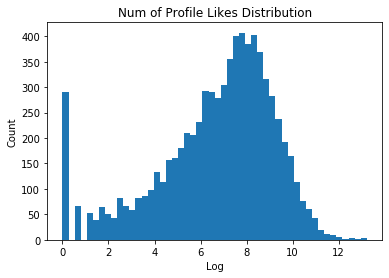

In [4]:
y = np.log(1 + loader.train["Num of Profile Likes"])
_ = plt.hist(y, bins=50)
_ = plt.title("Num of Profile Likes Distribution")
_ = plt.xlabel("Log")
_ = plt.ylabel("Count")

[Pipeline] .......... (step 1 of 2) Processing ToVector, total=   0.0s
[Pipeline] .. (step 2 of 2) Processing MissingIndicator, total=   0.0s


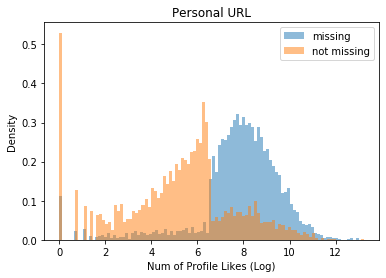

In [5]:
from smp.features.boolean import PersonalURL

feature = PersonalURL()
X = feature.fit_transform(X=loader.train)
y = np.log(1 + loader.train["Num of Profile Likes"])

_ = plt.hist(y[X.reshape(-1)], bins=100, alpha=0.5, density=True, label="missing")
_ = plt.hist(y[~X.reshape(-1)], bins=100, alpha=0.5, density=True, label="not missing")

_ = plt.title(feature.var_name)
_ = plt.xlabel("Num of Profile Likes (Log)")
_ = plt.ylabel("Density")
_ = plt.legend()

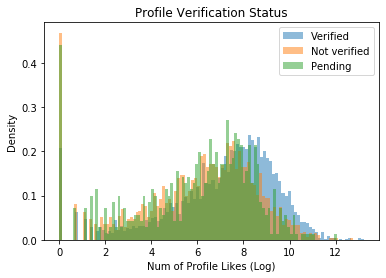

In [6]:
from smp.features.categorical import ProfileVerificationStatus

feature = ProfileVerificationStatus()
X = loader.train[feature.var_name]  # TODO use feature variable

_ = plt.hist(y[X == 'Verified'], bins=100, alpha=0.5, density=True, label="Verified")
_ = plt.hist(y[X == 'Not verified'], bins=100, alpha=0.5, density=True, label="Not verified")
_ = plt.hist(y[X == 'Pending'], bins=100, alpha=0.5, density=True, label="Pending")

_ = plt.title(feature.var_name)
_ = plt.xlabel("Num of Profile Likes (Log)")
_ = plt.ylabel("Density")
_ = plt.legend()

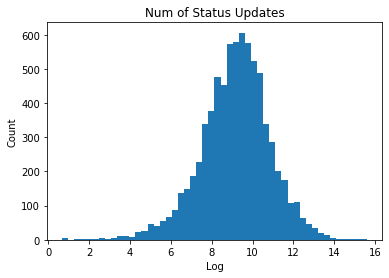

In [7]:
from smp.features.discrete import NumOfStatusUpdates

feature = NumOfStatusUpdates()
X = np.log(1+ loader.train[feature.var_name].values)  # TODO use feature variable

_ = plt.hist(X, bins=50,)
_ = plt.title(feature.var_name)
_ = plt.xlabel("Log")
_ = plt.ylabel("Count")

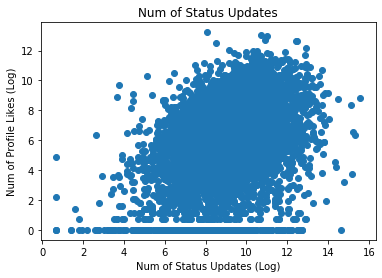

In [8]:
_ = plt.scatter(X, y)
_ = plt.title(feature.var_name)
_ = plt.xlabel("Num of Status Updates (Log)")
_ = plt.ylabel("Num of Profile Likes (Log)")

# Feature Engineering - 1 minute 30 seconds

- 21 initial features
    - Dropped User Name

<br>

- Boolean
    - No transform
    - Missing indicator
- Categorical
    - Binary encoder
    - One-hot encoder
- Discrete
    - Log transform
    - Standard scaler
- Elapsed Time
    - Convert timestamp to timedelta
    - Log transform
    - Standard scaler
- Float
    - Log transform
    - Standard scaler
- Image
    - 32 x 32
    - Crop and flatten
    - PCA
    - 10 components
- RGB
    - HEX to RGB
    - 3 dimensions vector

<br>

| Feature                          | Boolean | Categorical | Discrete | Elapsed Time | Float   | Image   | RBG     |
|----------------------------------|:-------:|:-----------:|:--------:|:------------:|:-------:|:-------:|:-------:|
| Personal URL                     | X       | <i></i>     | <i></i>  | <i></i>      | <i></i> | <i></i> | <i></i> |
| Profile Cover Image Status       | <i></i> |      X      | <i></i>  | <i></i>      | <i></i> | <i></i> | <i></i> |
| Profile Verification Status      | <i></i> |      X      | <i></i>  | <i></i>      | <i></i> | <i></i> | <i></i> |
| Profile Text Color               | <i></i> | <i></i>     | <i></i>  | <i></i>      | <i></i> | <i></i> | X       |
| Profile Page Color               | <i></i> | <i></i>     | <i></i>  | <i></i>      | <i></i> | <i></i> | X       |
| Profile Theme Color              | <i></i> | <i></i>     | <i></i>  | <i></i>      | <i></i> | <i></i> | X       |
| Is Profile View Size Customized? | X       | <i></i>     | <i></i>  | <i></i>      | <i></i> | <i></i> | <i></i> |
| UTC Offset                       | <i></i> | <i></i>     | X        | <i></i>      | <i></i> | <i></i> | <i></i> |
| Location                         | X       | <i></i>     | <i></i>  | <i></i>      | <i></i> | <i></i> | <i></i> |
| Location Public Visibility       | <i></i> |      X      | <i></i>  | <i></i>      | <i></i> | <i></i> | <i></i> |
| User Language                    | <i></i> |      X      | <i></i>  | <i></i>      | <i></i> | <i></i> | <i></i> |
| Profile Creation Timestamp       | <i></i> | <i></i>     | <i></i>  | X            | <i></i> | <i></i> | <i></i> |
| User Time Zone                   | <i></i> |      X      | <i></i>  | <i></i>      | <i></i> | <i></i> | <i></i> |
| Num of Followers                 | <i></i> | <i></i>     | X        | <i></i>      | <i></i> | <i></i> | <i></i> |
| Num of People Following          | <i></i> | <i></i>     | X        | <i></i>      | <i></i> | <i></i> | <i></i> |
| Num of Status Updates            | <i></i> | <i></i>     | X        | <i></i>      | <i></i> | <i></i> | <i></i> |
| Num of Direct Messages           | <i></i> | <i></i>     | X        | <i></i>      | <i></i> | <i></i> | <i></i> |
| Profile Category                 | <i></i> |      X      | <i></i>  | <i></i>      | <i></i> | <i></i> | <i></i> |
| Avg Daily Profile Visit Duration | <i></i> | <i></i>     | <i></i>  | <i></i>      | X       | <i></i> | <i></i> |
| Avg Daily Profile Clicks         | <i></i> | <i></i>     | <i></i>  | <i></i>      | X       | <i></i> | <i></i> |
| Profile Image                    | <i></i> | <i></i>     | <i></i>  | <i></i>      | <i></i> | X       | <i></i> |

<br>

- XX final features?

## Model Approach - 2 minute 30 seconds

- feature engineering pipeline

```yaml
datasets:
  default: &dataset_default
    cls: smp.features.features.Dataset
    parameters:
      transformer_list:
        - *feat_PersonalUrl_default
        - *feat_ProfileCoverImageStatus_default
        - *feat_ProfileVerificationStatus_default
        - *feat_IsProfileViewSizeCustomized_default
        - *feat_ProfileTextColor_default
        - *feat_ProfilePageColor_default
        - *feat_ProfileThemeColor_default
        - *feat_UtcOffset_default
        - *feat_Location_default
        - *feat_LocationPublicVisibility_default
        - *feat_UserLanguage_default
        - *feat_ProfileCreationTimestamp_default
        - *feat_UserTimeZone_default
        - *feat_NumOfFollowers_default
        - *feat_NumOfPeopleFollowing_default
        - *feat_NumOfStatusUpdates_default
        - *feat_NumOfDirectMessages_default
        - *feat_ProfileCategory_default
        - *feat_AvgDailyProfileVisitDuration_default
        - *feat_AvgDailyProfileClicks_default
        - *feat_ProfileImage_default
```

- model selection pipeline

```yaml
trials:
  - pipeline: *pipe_default
    parameters:
      estimator:
        cls: sklearn.linear_model.LinearRegression
        parameters: { }
      param_grid:
       fit_intercept: [True, False]
       normalize: [True, False]
```

In [9]:
from smp.train.__main__ import main

main(file_name="example.yml")

[Pipeline] .. (step 1 of 3) Processing Building Dataset, total=   6.2s
[Pipeline] .......... (step 2 of 3) Processing To Dense, total=   0.0s
[Pipeline] ....... (step 3 of 3) Processing Grid Search, total=   0.3s
{'best_params': {'fit_intercept': False, 'normalize': True},
 'best_score': 1.8103085523789917,
 'mean_scores': [89302838675891.78,
                 6312172269.545668,
                 1.8103085523789917,
                 1.8103085523789917]}


- linear model
    - linear regression
    - ridge
    - lasso
- random forest regressor
- gradient boosting regressor
- custom regressor
    - agglomerative clustering
    - knn classifier
    - gradient boosting regressor
- voting regressor
    - random forest regressor
    - gradient boosting regressor
    - custom regressor

In [10]:
main(file_name="voting_regressor.yml")

[Pipeline] .. (step 1 of 3) Processing Building Dataset, total=   5.3s
[Pipeline] .......... (step 2 of 3) Processing To Dense, total=   0.0s
[Pipeline] ....... (step 3 of 3) Processing Grid Search, total=  58.7s
{'best_params': {'weights': [0.25, 0.25, 0.75]},
 'best_score': 1.7076205048759703,
 'mean_scores': [1.7076205048759703]}


## Validation Approach - 1 minute

- replicated RMSLE
- validation pipeline
    - grid search
    - 5-fold CV

```yaml
pipelines:
  default: &pipe_default
    - *dataset_default
    - cls: smp.features.features.ToDense
      parameters: {}
    - cls: sklearn.model_selection.GridSearchCV
      name: Grid Search
      parameters:
        estimator:
          $ref: estimator
        param_grid:
          $ref: param_grid
        n_jobs: -1
        scoring: "neg_mean_squared_error"
```

- linear regression
```json
{
    "mean_scores": [
        89302838675891.78,
        6312172269.545668,
        1.8103085523789917,
        1.8103085523789917
],
    "best_params": {"fit_intercept": false, "normalize": true},
    "best_score": 1.8103085523789917
}
```

- voting regressor
```json
{
    "mean_scores": [
        1.7128306493934538,
        1.7101315096599865,
        1.711614757488679,
        1.7107592809554562
    ],
    "best_params": {"weights": [0.25, 0.25, 0.75]},
    "best_score": 1.7101315096599865
}
```